<a href="https://colab.research.google.com/github/Darren7218/DS_Assignment_Life_Expentancy/blob/main/DS_Assignment_LifeExpectancy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Colab Notebook for Task 2 - UCCC3073 Data Science Assignment
# Dataset: Life Expectancy (WHO) - Kaggle

# --- 1. Setup ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# --- 2. Load Data ---
df = pd.read_csv("Life Expectancy Data.csv")

print("Dataset shape:", df.shape) # 2938 > 2000 records, 22 > 10 attritubes (both requirements achieved)
df.head()

Dataset shape: (2938, 22)


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# --- 3. Data Cleaning ---
print(df.isnull().sum())
# Fill missing numeric values with median
df.fillna(df.median(numeric_only=True), inplace=True)

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


In [ ]:
# Check duplicates
print(df.duplicated().sum())

0


In [ ]:
# Clean column (space and others)
df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [ ]:
# --- 4. Exploratory Data Analysis ---
print(df.describe())

              Year  Life_expectancy  Adult_Mortality  infant_deaths  \
count  2938.000000      2938.000000      2938.000000    2938.000000   
mean   2007.518720        69.234717       164.725664      30.303948   
std       4.613841         9.509115       124.086215     117.926501   
min    2000.000000        36.300000         1.000000       0.000000   
25%    2004.000000        63.200000        74.000000       0.000000   
50%    2008.000000        72.100000       144.000000       3.000000   
75%    2012.000000        75.600000       227.000000      22.000000   
max    2015.000000        89.000000       723.000000    1800.000000   

           Alcohol  percentage_expenditure  Hepatitis_B        Measles  \
count  2938.000000             2938.000000  2938.000000    2938.000000   
mean      4.546875              738.251295    83.022124    2419.592240   
std       3.921946             1987.914858    22.996984   11467.272489   
min       0.010000                0.000000     1.000000       0.

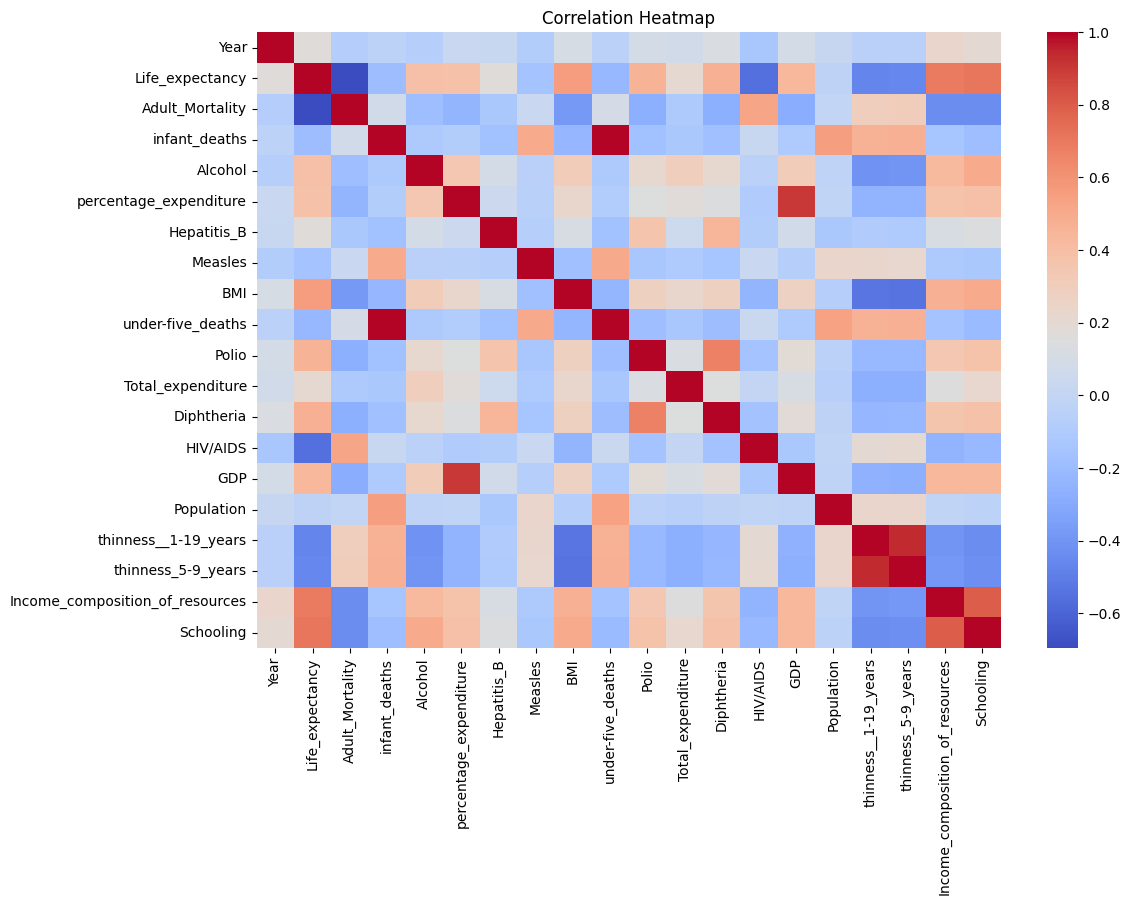

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), cmap="coolwarm", annot=False) # only numberic columns
plt.title("Correlation Heatmap")
plt.show()

**Key Visualisations**

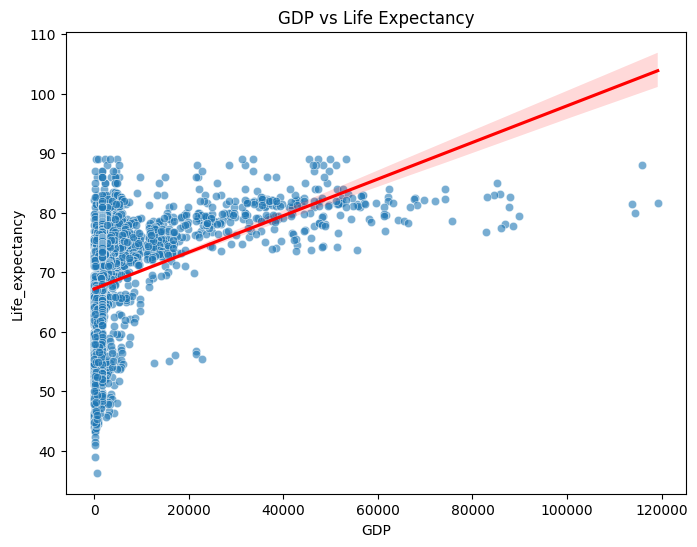

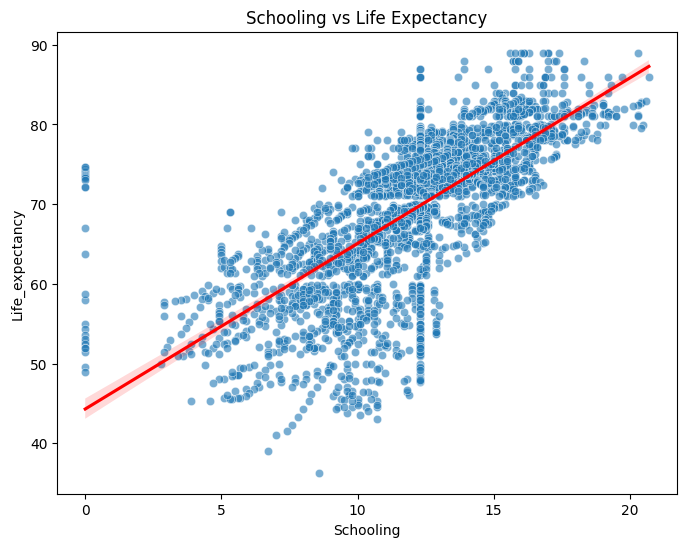

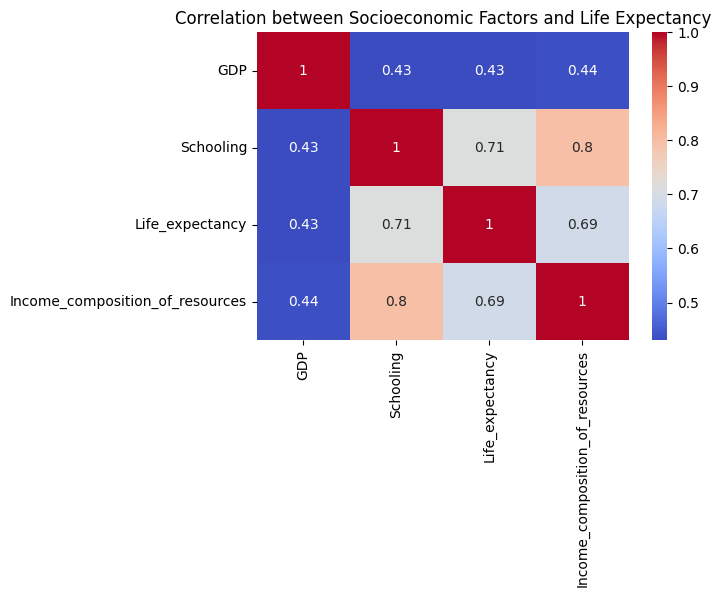

In [ ]:
# Scatter plot: GDP vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="GDP", y="Life_expectancy", alpha=0.6)
sns.regplot(data=df, x="GDP", y="Life_expectancy", scatter=False, color="red")
plt.title("GDP vs Life Expectancy")
plt.show()

# Scatter plot: Schooling vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Schooling", y="Life_expectancy", alpha=0.6)
sns.regplot(data=df, x="Schooling", y="Life_expectancy", scatter=False, color="red")
plt.title("Schooling vs Life Expectancy")
plt.show()

# Correlation heatmap (socioeconomic only)
plt.figure(figsize=(6,4))
sns.heatmap(df[["GDP", "Schooling", "Life_expectancy", "Income_composition_of_resources"]].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation between Socioeconomic Factors and Life Expectancy")
plt.show()


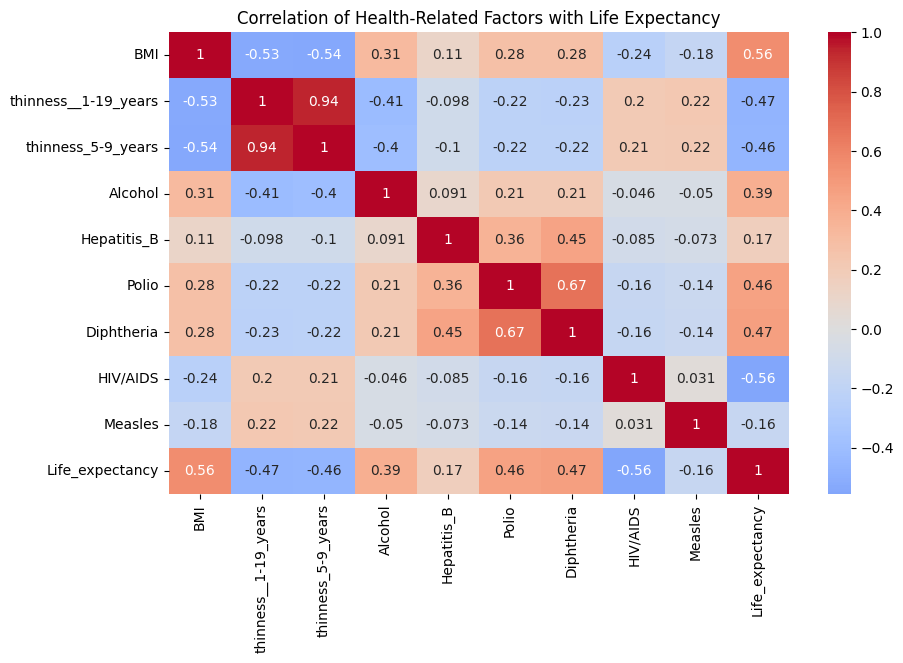

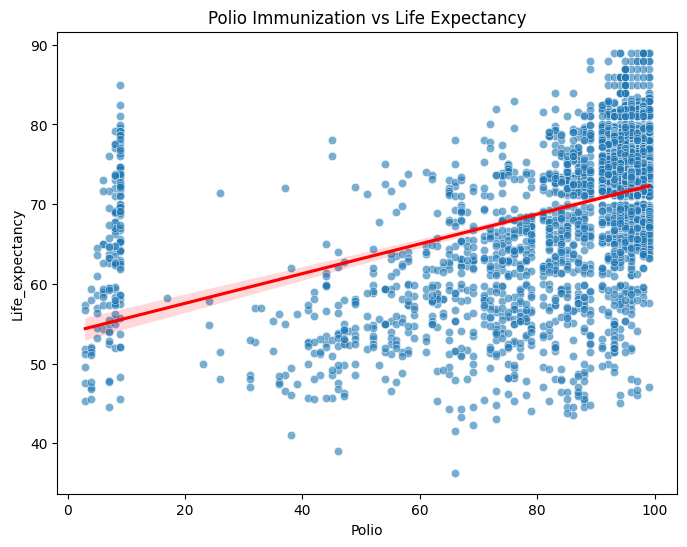

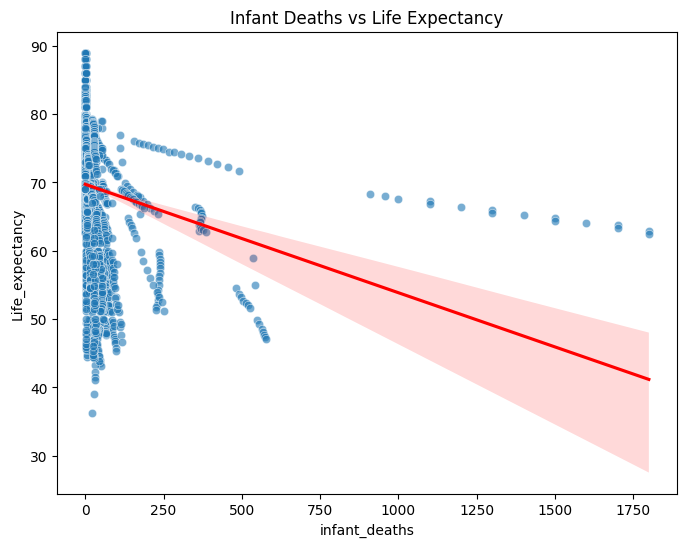

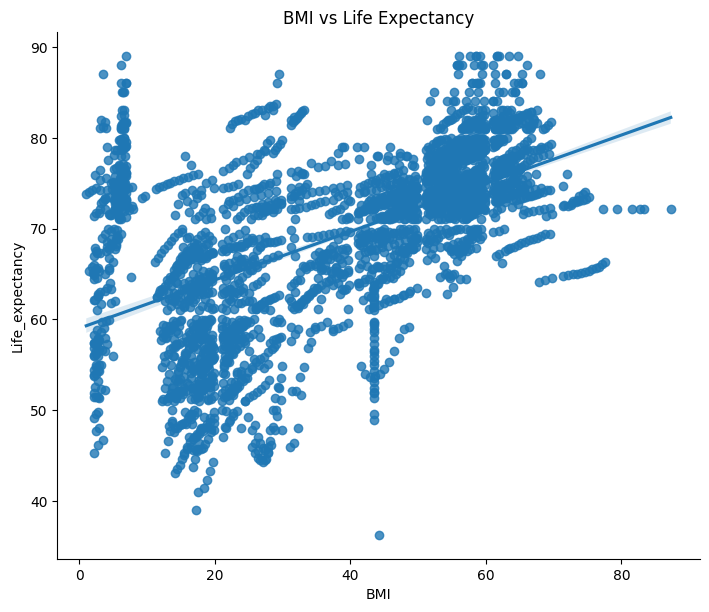

In [ ]:
# Select key health variables
health_vars = [
    "BMI", "thinness__1-19_years", "thinness_5-9_years", "Alcohol",
    "Hepatitis_B", "Polio", "Diphtheria",
    "HIV/AIDS", "Measles", "Life_expectancy"
]

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[health_vars].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation of Health-Related Factors with Life Expectancy")
plt.show()

# Scatter plot: Immunization (Polio) vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Polio", y="Life_expectancy", alpha=0.6)
sns.regplot(data=df, x="Polio", y="Life_expectancy", scatter=False, color="red")
plt.title("Polio Immunization vs Life Expectancy")
plt.show()

# Scatter plot: Infant deaths vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="infant_deaths", y="Life_expectancy", alpha=0.6)
sns.regplot(data=df, x="infant_deaths", y="Life_expectancy", scatter=False, color="red")
plt.title("Infant Deaths vs Life Expectancy")
plt.show()


sns.lmplot(data=df, x="BMI", y="Life_expectancy", height=6, aspect=1.2)
plt.title("BMI vs Life Expectancy")
plt.show()

In [ ]:
# Compare correlations
compare_vars = ["Life_expectancy", "Total_expenditure", "Alcohol", "BMI"]

plt.figure(figsize=(6,4))
sns.heatmap(df[compare_vars].corr(), annot=True, cmap="coolwarm", center=0)
plt.title("Healthcare Expenditure vs Lifestyle Factors (Correlation with Life Expectancy)")
plt.show()

# Scatter plot: Healthcare expenditure vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Total_expenditure", y="Life_expectancy", alpha=0.6)
sns.regplot(data=df, x="Total_expenditure", y="Life_expectancy", scatter=False, color="red")
plt.title("Healthcare Expenditure vs Life Expectancy")
plt.show()

# Scatter plot: Alcohol vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Alcohol", y="Life_expectancy", alpha=0.6)
sns.regplot(data=df, x="Alcohol", y="Life_expectancy", scatter=False, color="red")
plt.title("Alcohol Consumption vs Life Expectancy")
plt.show()

# Scatter plot: BMI vs Life Expectancy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="BMI", y="Life_expectancy", alpha=0.6)
sns.regplot(data=df, x="BMI", y="Life_expectancy", scatter=False, color="red")
plt.title("BMI vs Life Expectancy")
plt.show()


In [ ]:
# 1. Correlation Heatmap (Education, GDP, HIV/AIDS, etc.)
plt.figure(figsize=(10,6))
corr_features = ["Life_expectancy", "Schooling", "GDP", "HIV/AIDS", "Alcohol", "BMI"]
corr_matrix = df[corr_features].corr()

sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Key Features and Life Expectancy")
plt.show()

Analysis Use:

Schooling (high +ve correlation) and HIV/AIDS (high -ve correlation) stand out.

Justifies why education and disease prevention appear as the most impactful policy levers.

In [ ]:
# 2. GDP vs Life Expectancy (Scatter by Status)
plt.figure(figsize=(10,6))
sns.scatterplot(x="GDP", y="Life_expectancy", hue="Status", data=df, alpha=0.7)
plt.xscale("log")  # GDP is skewed, log scale gives clearer view
plt.title("GDP vs Life Expectancy by Country Status")
plt.xlabel("GDP (log scale)")
plt.ylabel("Life Expectancy")
plt.show()

Analysis Use:

Developing countries cluster at low GDP + low life expectancy.

Developed countries plateau around 75–85 years, showing wealth alone doesn’t guarantee higher life expectancy.

In [ ]:
# 3. Life Expectancy Trend (2000–2015, by Status)
plt.figure(figsize=(12,6))
sns.lineplot(x="Year", y="Life_expectancy", hue="Status", data=df, ci=None, marker="o")
plt.title("Trends in Life Expectancy (2000–2015)")
plt.ylabel("Average Life Expectancy")
plt.show()

Analysis Use:

Both groups improved, but developing countries made faster relative gains (due to vaccines & HIV/AIDS programs).

Gap between developed and developing countries remains.

# **EXTRA PARTS at below**

In [ ]:
# --- 5. Query Examples ---
print("Top 10 countries with highest life expectancy:")
print(df.groupby("Country")["Life_expectancy"].mean().sort_values(ascending=False).head(10))

print("\nAverage life expectancy (Developed vs Developing):")
print(df.groupby("Status")["Life_expectancy"].mean())


In [ ]:
# --- 6. Linear Regression ---
features = ["GDP", "Schooling", "BMI", "HIV/AIDS", "Alcohol"]
X = df[features]
y = df["Life_expectancy"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression().fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

print("Linear Regression R^2:", r2_score(y_test, y_pred))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
# Feature importance (coefficients)
coeffs = pd.DataFrame({"Feature": features, "Coefficient": lr_model.coef_})
print(coeffs)

sns.barplot(x="Coefficient", y="Feature", data=coeffs)
plt.title("Linear Regression Feature Importance")
plt.show()

In [ ]:
# --- 7. Classification (Naive Bayes & KNN) ---
# Categorize Life Expectancy into Low (<60), Medium (60-75), High (>75)
def categorize(life_exp):
    if life_exp < 60:
        return "Low"
    elif life_exp <= 75:
        return "Medium"
    else:
        return "High"

cls = df["Life_expectancy"].apply(categorize)

X_cls = df[features]
y_cls = cls

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


In [ ]:
# Naive Bayes
nb = GaussianNB().fit(X_train, y_train)
y_nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_nb_pred))
print(confusion_matrix(y_test, y_nb_pred))
print(classification_report(y_test, y_nb_pred))


In [ ]:
# KNN
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_knn_pred = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_knn_pred))
print(confusion_matrix(y_test, y_knn_pred))
print(classification_report(y_test, y_knn_pred))

# **MORE VISUALIZATION**

In [ ]:
# --- 8. Visualization Examples ---
# Scatter plot GDP vs Life Expectancy
sns.scatterplot(x="GDP", y="Life_expectancy", hue="Status", data=df)
plt.title("GDP vs Life Expectancy by Status")
plt.show()

# Trend of Life Expectancy over years
sns.lineplot(x="Year", y="Life_expectancy", hue="Status", data=df)
plt.title("Life Expectancy Trends (2000–2015)")
plt.show()



In [ ]:
# Life Expectancy by Country (Top 10) not good
top_countries = df.groupby("Country")["Life_expectancy"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Life Expectancy")
plt.xlabel("Average Life Expectancy")
plt.ylabel("Country")
plt.show()

# Life Expectancy vs GDP
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="GDP", y="Life_expectancy")
plt.title("Life Expectancy vs GDP")
plt.show()

# Life Expectancy vs Health Expenditure
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="percentage_expenditure", y="Life_expectancy")
plt.title("Life Expectancy vs Health Expenditure")
plt.show()

In [ ]:
from statsmodels.nonparametric.smoothers_lowess import lowess
#set column name to lower case
df.columns = df.columns.str.lower()
# ==== Figure 1: Correlation Heatmap ====
corr_vars = [
    'life_expectancy','gdp','schooling','percentage_expenditure',
    'adult_mortality','hiv/aids','hepatitis_b','polio','diphtheria'
]
corr = df[corr_vars].corr(method='pearson')
plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Figure 1. Correlation Heatmap (Key Variables)')
plt.tight_layout(); plt.savefig('fig1_heatmap.png', dpi=200); plt.show()

# ==== Figure 2: Life Expectancy vs log(GDP) with LOWESS ====
plot = df[['life_expectancy','gdp']].dropna().copy()
plot['log_gdp'] = np.log10(plot['gdp'].replace(0, np.nan))
plot = plot.dropna()
smoothed = lowess(plot['life_expectancy'], plot['log_gdp'], frac=0.3, return_sorted=True)

plt.figure(figsize=(8,6))
plt.scatter(plot['log_gdp'], plot['life_expectancy'], alpha=0.35)
plt.plot(smoothed[:,0], smoothed[:,1], linewidth=2)
plt.xlabel('log10(GDP per capita)')
plt.ylabel('Life expectancy (years)')
plt.title('Figure 2. Life Expectancy vs log(GDP) with LOWESS')
plt.tight_layout(); plt.savefig('fig2_lifeexp_loggdp.png', dpi=200); plt.show()

# ==== Figure 3: Life Expectancy vs Measles Immunization (%), colored by Status ====
df['status'] = df['status'].astype('category')
plt.figure(figsize=(8,6))
for status, sub in df.groupby('status'):
    plt.scatter(sub['measles'], sub['life_expectancy'], alpha=0.35, label=str(status))
plt.xlabel('Measles immunization (%)')
plt.ylabel('Life expectancy (years)')
plt.title('Figure 3. Life Expectancy vs Measles Immunization (%)')
plt.legend(title='Status')
plt.tight_layout(); plt.savefig('fig3_lifeexp_measles.png', dpi=200); plt.show()

In [ ]:
# Research Question Insights
# -------------------------------
# Example: Correlation between GDP and Life Expectancy
corr_gdp = df["gdp"].corr(df["life_expectancy"])
print(f"Correlation between GDP and Life Expectancy: {corr_gdp:.2f}")

# Example: Correlation between Alcohol Consumption and Life Expectancy
corr_alcohol = df["alcohol"].corr(df["life_expectancy"])
print(f"Correlation between Alcohol Consumption and Life Expectancy: {corr_alcohol:.2f}")


In [ ]:
# --- 9. Wrap Up ---
print("Analysis complete. Proceed to interpret findings and write recommendations in report.")

In [ ]:
# Save cleaned df to csv
df.to_csv("cleaned_life_expectancy_data.csv", index = False)